import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick



In [2]:
#Reading in the ispections file
restInspectAnchorage = pd.read_csv('../data/restaurant-and-food-inspections-of-anchorage-1.csv')
restInspectAnchorage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             45006 non-null  object 
 1   business_name           45006 non-null  object 
 2   business_address        45006 non-null  object 
 3   business_city           45006 non-null  object 
 4   business_state          45006 non-null  object 
 5   business_postal_code    45006 non-null  int64  
 6   business_phone_number   31779 non-null  float64
 7   inspection_date         45006 non-null  object 
 8   inspection_score        27178 non-null  float64
 9   inspection_description  45006 non-null  object 
 10  inspection_type         45006 non-null  object 
 11  violation_description   30515 non-null  object 
 12  violation_code          30516 non-null  object 
 13  business_location       45006 non-null  object 
dtypes: float64(2), int64(1), object(11)
me

In [3]:
restInspectAnchorage

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_phone_number,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,violation_code,business_location
0,FA0005362 (https://anchorageonline.envisioncon...,MCGINLEYS PUB,645 G ST,ANCHORAGE,AK,99501,9.072792e+09,03/07/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",0008,"645 G ST\nANCHORAGE, AK 99501\n(61.2157799112,..."
1,FA0000274 (https://anchorageonline.envisioncon...,VILLAGE INN #1,1130 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,995084219,9.072796e+09,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,0001,"1130 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
2,FA0007874 (https://anchorageonline.envisioncon...,RONNIE SUSHI 2,924 MULDOON RD,ANCHORAGE,AK,99504,9.073380e+09,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,0034,"924 MULDOON RD\nANCHORAGE, AK 99504\n(61.21387..."
3,FA0001485 (https://anchorageonline.envisioncon...,FRED MEYER - RETAIL FISH,1000 E NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NaN,12/23/2003,96.0,NO ACTION,Regular,NaN,NaN,"1000 E NORTHERN LIGHTS BLVD\nANCHORAGE, AK 995..."
4,FA0009047 (https://anchorageonline.envisioncon...,PHO GRILL,8809 JEWEL LAKE RD,ANCHORAGE,AK,99502,9.078682e+09,07/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,0007,"8809 JEWEL LAKE RD\nANCHORAGE, AK 99502\n(61.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45001,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,AK,995015307,9.072768e+09,07/19/2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,NONFOOD-CONTACT SURFACES CLEAN,0047,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2..."
45002,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,AK,995015307,9.072768e+09,07/19/2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",0008,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2..."
45003,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,AK,995015307,9.072768e+09,07/19/2018,NaN,NO ACTION,Complaint,"PROPER COOLING METHODS, ADEQUATE EQUIPMENT",0031,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2..."
45004,FA0000261 (https://anchorageonline.envisioncon...,TWIN DRAGON,612 E 15TH AVE,ANCHORAGE,AK,995015307,9.072768e+09,07/19/2018,NaN,NO ACTION,Complaint,PROPER HOT HOLDING TEMPERATURES,0019,"612 E 15TH AVE\nANCHORAGE, AK 995015307\n(61.2..."


In [4]:
restInspectAnchorage['violation_description'].unique()

array(['HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE',
       'DEMONSTRATION OF KNOWLEDGE', 'THERMOMETERS PROVIDED AND ACCURATE',
       nan, 'BARE HAND CONTACT WITH READY TO EAT FOOD',
       '12  HANDS CLEAN, GOOD HYGIENE, CERTIFICATION',
       'PLUMBING INSTALLED, PROPER BACKFLOW DEVICES',
       'NONFOOD-CONTACT SURFACES CLEAN',
       'PHYSICAL FACILITIES INSTALLED, MAINTAINED, CLEAN',
       '10  IN-USE FOOD AND ICE UTENSILS PROPERLY STORED',
       '08  FOOD PROTECTED FROM CROSS CONTAMINATION',
       'PROPER COLD HOLDING TEMPERATURES',
       'HANDS CLEAN AND PROPERLY WASHED',
       'FOOD PROPERLY LABELED, ORIGINAL CONTAINER',
       '20  PROPER SANITIZATION, TEMPERATURE, CHEMICALS',
       '17  ACCURATE THERMOMETERS AND CHEMICAL TEST KITS',
       'PROPER HOT HOLDING TEMPERATURES',
       '09  Pool water chemistry within limits',
       'HOT AND COLD WATER AVAILABLE, ADEQUATE PRESSURE',
       'FOOD CONTACT SURFACES CLEAN AND SANITIZED',
       'INSECTS, RODENTS, ANIMALS NOT 

In [5]:
restInspectAnchorage.isnull().sum()

business_id                   0
business_name                 0
business_address              0
business_city                 0
business_state                0
business_postal_code          0
business_phone_number     13227
inspection_date               0
inspection_score          17828
inspection_description        0
inspection_type               0
violation_description     14491
violation_code            14490
business_location             0
dtype: int64

In [6]:
#Dropping unnecessary columns
restInspectAnchorage.drop(["business_address", "business_phone_number", "business_location", "violation_code"], axis = 1, inplace = True)
restInspectAnchorage.head()

,business_id,business_name,business_city,business_state,business_postal_code,inspection_date,inspection_score,inspection_description,inspection_type,violation_description
0,FA0005362 (https://anchorageonline.envisioncon...,MCGINLEYS PUB,ANCHORAGE,AK,99501,03/07/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE"
1,FA0000274 (https://anchorageonline.envisioncon...,VILLAGE INN #1,ANCHORAGE,AK,995084219,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE
2,FA0007874 (https://anchorageonline.envisioncon...,RONNIE SUSHI 2,ANCHORAGE,AK,99504,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE
3,FA0001485 (https://anchorageonline.envisioncon...,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,12/23/2003,96.0,NO ACTION,Regular,NaN
4,FA0009047 (https://anchorageonline.envisioncon...,PHO GRILL,ANCHORAGE,AK,99502,07/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD


In [7]:
#Getting info
restInspectAnchorage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             45006 non-null  object 
 1   business_name           45006 non-null  object 
 2   business_city           45006 non-null  object 
 3   business_state          45006 non-null  object 
 4   business_postal_code    45006 non-null  int64  
 5   inspection_date         45006 non-null  object 
 6   inspection_score        27178 non-null  float64
 7   inspection_description  45006 non-null  object 
 8   inspection_type         45006 non-null  object 
 9   violation_description   30515 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [8]:
restInspectAnchorage['business_postal_code'] = restInspectAnchorage['business_postal_code'].astype(str)
restInspectAnchorage['business_postal_code'].dtypes

dtype('O')

In [9]:
#Checking to see how many unique inspection types there are
restInspectAnchorage.inspection_type.unique()

array(['Regular', 'Other', 'Complaint', 'HACCP - INACTIVE', 'Enforcement',
       'Change of Ownership', 'Opening', 'Reinspection',
       'FBI - INACTIVE CODE', 'Plan Review', 'FOLLOW-UP',
       'C/R - INACTIVE CODE', 'FU - INACTIVE CODE', 'OB - INACTIVE CODE'],
      dtype=object)

In [10]:
#Converting to Dataframe
restInspectAnchorage_df = pd.DataFrame(restInspectAnchorage)

In [11]:
#Checking info after some cleanup was done
restInspectAnchorage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             45006 non-null  object 
 1   business_name           45006 non-null  object 
 2   business_city           45006 non-null  object 
 3   business_state          45006 non-null  object 
 4   business_postal_code    45006 non-null  object 
 5   inspection_date         45006 non-null  object 
 6   inspection_score        27178 non-null  float64
 7   inspection_description  45006 non-null  object 
 8   inspection_type         45006 non-null  object 
 9   violation_description   30515 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.4+ MB


In [12]:
#Removed url that was after each business id
restInspectAnchorage_df.business_id = restInspectAnchorage_df.business_id.str[0:9]
restInspectAnchorage_df

,business_id,business_name,business_city,business_state,business_postal_code,inspection_date,inspection_score,inspection_description,inspection_type,violation_description
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,03/07/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE"
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,995084219,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,12/23/2003,96.0,NO ACTION,Regular,NaN
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,07/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD
...,...,...,...,...,...,...,...,...,...,...
45001,FA0000261,TWIN DRAGON,ANCHORAGE,AK,995015307,07/19/2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,NONFOOD-CONTACT SURFACES CLEAN
45002,FA0000261,TWIN DRAGON,ANCHORAGE,AK,995015307,07/19/2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE"
45003,FA0000261,TWIN DRAGON,ANCHORAGE,AK,995015307,07/19/2018,NaN,NO ACTION,Complaint,"PROPER COOLING METHODS, ADEQUATE EQUIPMENT"
45004,FA0000261,TWIN DRAGON,ANCHORAGE,AK,995015307,07/19/2018,NaN,NO ACTION,Complaint,PROPER HOT HOLDING TEMPERATURES


In [13]:
restInspectAnchorage_df.business_postal_code.nunique()

52

In [14]:
restInspectAnchorage_df.business_postal_code = restInspectAnchorage_df.business_postal_code.astype(str)
restInspectAnchorage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45006 entries, 0 to 45005
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             45006 non-null  object 
 1   business_name           45006 non-null  object 
 2   business_city           45006 non-null  object 
 3   business_state          45006 non-null  object 
 4   business_postal_code    45006 non-null  object 
 5   inspection_date         45006 non-null  object 
 6   inspection_score        27178 non-null  float64
 7   inspection_description  45006 non-null  object 
 8   inspection_type         45006 non-null  object 
 9   violation_description   30515 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.4+ MB


In [15]:
#Making postal code only the first five digits
restInspectAnchorage_df.business_postal_code = restInspectAnchorage_df.business_postal_code.str[0:5]
restInspectAnchorage_df

,business_id,business_name,business_city,business_state,business_postal_code,inspection_date,inspection_score,inspection_description,inspection_type,violation_description
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,03/07/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE"
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,12/23/2003,96.0,NO ACTION,Regular,NaN
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,07/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD
...,...,...,...,...,...,...,...,...,...,...
45001,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,07/19/2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,NONFOOD-CONTACT SURFACES CLEAN
45002,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,07/19/2018,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE"
45003,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,07/19/2018,NaN,NO ACTION,Complaint,"PROPER COOLING METHODS, ADEQUATE EQUIPMENT"
45004,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,07/19/2018,NaN,NO ACTION,Complaint,PROPER HOT HOLDING TEMPERATURES


In [16]:
restInspectAnchorage_df['inspection_month'] = restInspectAnchorage_df['inspection_date'].str[0:2]
restInspectAnchorage_df['inspection_day'] = restInspectAnchorage_df['inspection_date'].str[3:5]
restInspectAnchorage_df['inspection_year'] = restInspectAnchorage_df['inspection_date'].str[6:]
restInspectAnchorage_df.head(40)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_date,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,03/07/2017,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,10/21/2015,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,11/22/2016,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,12/23/2003,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,07/13/2017,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,09/10/2008,95.0,NO ACTION,Regular,"12 HANDS CLEAN, GOOD HYGIENE, CERTIFICATION",09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,01/28/2015,NaN,NO ACTION,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,04/18/2012,NaN,NO ACTION,Regular,"PLUMBING INSTALLED, PROPER BACKFLOW DEVICES",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,11/28/2017,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,01/24/2012,NaN,NO ACTION,Regular,NONFOOD-CONTACT SURFACES CLEAN,01,24,2012


In [17]:
#restInspectAnchorage_df['inspection_month'].replace('01', 'Jan', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('02', 'Feb', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('03', 'Mar', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('04', 'Apr', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('05', 'May', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('06', 'Jun', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('07', 'Jul', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('08', 'Aug', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('09', 'Sep', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('10', 'Oct', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('11', 'Nov', inplace = True)
#restInspectAnchorage_df['inspection_month'].replace('12', 'Dec', inplace = True)

In [18]:
restInspectAnchorage_df.drop(["inspection_date"], axis = 1, inplace = True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,"12 HANDS CLEAN, GOOD HYGIENE, CERTIFICATION",09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,"HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE",01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"PLUMBING INSTALLED, PROPER BACKFLOW DEVICES",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,NONFOOD-CONTACT SURFACES CLEAN,01,24,2012


In [19]:
restInspectAnchorage_df.isnull().sum()

business_id                   0
business_name                 0
business_city                 0
business_state                0
business_postal_code          0
inspection_score          17828
inspection_description        0
inspection_type               0
violation_description     14491
inspection_month              0
inspection_day                0
inspection_year               0
dtype: int64

In [20]:
#Replacement: Handwashing and Toilet Facilities and checking the dataframe - 1
oldString1 = ['HANDWASHING FACILITIES SUPPLIED, ACCESSIBLE', 
              'Adequate handwashing facilities properly supplied',
             '31  HANDWASHING SINKS ACCESSIBLE, INSTALLED',
             'HANDWASHING SINK', '32  HANDSOAP/TOWELS, TOILET ROOMS CLEAN, PROVIDED']
newString1 = 'Handwashing and Toilet Facilities'
restInspectAnchorage_df['violation_description'].replace(oldString1, newString1, inplace=True)
restInspectAnchorage_df.head(60)   




    
    
    
    

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,"12 HANDS CLEAN, GOOD HYGIENE, CERTIFICATION",09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"PLUMBING INSTALLED, PROPER BACKFLOW DEVICES",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,NONFOOD-CONTACT SURFACES CLEAN,01,24,2012


In [21]:
#Replacement: Employee Health and checking the dataframe - 2 
oldString2 = ['12  HANDS CLEAN, GOOD HYGIENE, CERTIFICATION',
              'HANDS CLEAN AND PROPERLY WASHED',
              'C1X - Handwashing',
              '11  PERSONNEL WITH INFECTIONS RESTRICTED',
              'Hands clean and properly washed',
              'EMPLOYEE HEALTH RESTRICTION AND EXCLUSION',
              'EMPLOYEE HEALTH POLICY',
              '12  HYGIENE, CERTIFICATION', 'DISCHARGE FROM EYES, NOSE, MOUTH',
              'TB CLEARANCES']
newString2 = 'Employee Health'
restInspectAnchorage_df['violation_description'].replace(oldString2, newString2, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"PLUMBING INSTALLED, PROPER BACKFLOW DEVICES",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,NONFOOD-CONTACT SURFACES CLEAN,01,24,2012


In [22]:
#Replacement: Temperature Control Procedures and checking the dataframe - 3
oldString3 = ['PROPER COLD HOLDING TEMPERATURES',
              'PROPER HOT HOLDING TEMPERATURES',
              '03  FOOD TEMPERATURE MEETS REQUIREMENTS',
              'PROPER REHEATING FOR HOT HOLDING',
              'PROPER REHEATING FOR HOT HOLDING',
              'Proper reheating procedures for hot holding',
              'FOOD TEMPERATURE',
              'PLANT FOOD PROPERLY COOKED FOR HOT HOLDING',
              'Proper cooking time and temperatures',
              'B1X Proper Cooling Process',
              'E2X - Hot holding temperatures',
              'FOOD RECEIVED AT PROPER TEMPERATURE',
              'PROPER TEMPERATURE',
              'PROPER COOKING TIME AND TEMPERATURE',
              'PROPER COOLING TIME AND TEMPERATURES',
              'Proper cold holding temperatures',
              'Proper cooling time and temperatures',
              'PROPER COOLING METHODS, ADEQUATE EQUIPMENT',
              'APPROVED THAWING METHODS USED',
              '06  POTENTIALLY HAZARDOUS FOOD PROPERLY THAWED',
              'B2X - PHF maintained at 45/41 F.']
newString3 = 'Temperature Control Procedures'
restInspectAnchorage_df['violation_description'].replace(oldString3, newString3, inplace=True)
restInspectAnchorage_df.head(40)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"PLUMBING INSTALLED, PROPER BACKFLOW DEVICES",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,NONFOOD-CONTACT SURFACES CLEAN,01,24,2012


In [23]:
#Replacement: Approved Source and checking the dataframe - 4
oldString4 = ['FOOD FROM AN APPROVED SOURCE',
              'Food obtained from approved source',
              'Food obtained from approved source',
              '01  FOOD FROM APPROVED SOURCE, SOUND CONDITION',
              'WATER AND ICE FROM APPROVED SOURCE',
              'Water & ice from approved source',
              'HIGHLY SUSCEPTIBLE POPULATIONS, PROHIBITED FOODS',
              'PASTEURIZED EGGS USED WHERE REQUIRED'
]
newString4 = 'Approved Source'
restInspectAnchorage_df['violation_description'].replace(oldString4, newString4, inplace=True)


In [24]:
restInspectAnchorage_df

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
45001,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,NONFOOD-CONTACT SURFACES CLEAN,07,19,2018
45002,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,07,19,2018
45003,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,NaN,NO ACTION,Complaint,Temperature Control Procedures,07,19,2018
45004,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,NaN,NO ACTION,Complaint,Temperature Control Procedures,07,19,2018


In [25]:
#Replacement: Water, Sewage, Plumbing Systems - 5
oldString5 = ['HOT AND COLD WATER AVAILABLE, ADEQUATE PRESSURE',
              'SEWAGE AND WASTE WATER PROPERLY DISPOSED',
              'Hot & cold water available; adequate pressure',
              '28  PROPER SEWAGE AND WASTEWATER DISPOSAL',
              'Plumbing installed; proper backflow devices',
              '27  WATER SOURCE SAFE, HOT & COLD WATER PROVIDED',
              '30  PLUMBING; PREVENT CROSS CONNECTION, BACKFLOW',
              'PLUMBING INSTALLED, PROPER BACKFLOW DEVICES',
              '11  Monthly water sampling',
              '04  Pumps, balance tanks, filters - sized properly',
              '06  Gutters, skimmers, strainers, drains, inlets',
              '03  Filters approved, maintained, backwashed'

]
newString5 = 'Water, Sewage, Plumbing Systems'
restInspectAnchorage_df['violation_description'].replace(oldString5, newString5, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,NONFOOD-CONTACT SURFACES CLEAN,01,24,2012


In [26]:
#Replacement: Cleaning of Equipment and Utensils - 6
oldString6 = ['FOOD CONTACT SURFACES CLEAN AND SANITIZED',
              '22  FOOD CONTACT SURFACES OF EQUIPMENT CLEAN',
              'Food-contact surfaces: cleaned and sanitized',
              'Nonfood-contact surfaces clean',
              '23  NON-FOOD CONTACT SURFACES CLEAN',
              'NONFOOD-CONTACT SURFACES CLEAN',
              'WAREWASHING FACILITIES, INSTALLED,TEST STRIPS',
              'Warewashing facilities: installed, maintained, & u',
              '21  WIPING CLOTHS CLEAN, USE RESTRICTED',
              'WIPING CLOTHS PROPERLY USED AND STORED',
              'Wiping cloths: properly used & stored',
              '18  SOILED DISHES PREFLUSHED, SCRAPED, SOAKED',
              'UTENSILS & EQUIPMENT CLEANING FACILITES PROVIDED; NON-TOXIC; CLEAN',
              '16  PROPER PROCEDURE/ MAINTENANCE OF DISHWASHING']
newString6 = 'Cleaning of Equipment and Utensils'
restInspectAnchorage_df['violation_description'].replace(oldString6, newString6, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [27]:
#Replacement: Pest Control - 7
oldString7 = ['INSECTS, RODENTS, ANIMALS NOT PRESENT',
              'Insects, rodents, & animals not present; no unauth',
              '35  INSECT AND RODENT CONTROL',
              '35  INSECT/RODENT CONTROL, OUTER OPENING PROTECTED']
newString7 = 'Pest Control'
restInspectAnchorage_df['violation_description'].replace(oldString7, newString7, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [28]:
#Replacement: Wholesome, Free of Spoilage - 8
oldString8 = ['FOOD IN GOOD CONDITION, SAFE, UNADULTERATED',
              'Food in good condition, safe and unadulterated',
              'PREVIOUSLY SERVED AND UNSAFE FOOD']
newString8 = 'Wholesome, Free of Spoilage'
restInspectAnchorage_df['violation_description'].replace(oldString8, newString8, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [29]:
#Replacement: Sanitation Rinse - 9
oldString9 = ['19 WASH, RINSE WATER CLEAN, PROPER TEMPERATURE']
newString9 = 'Sanitation Rinse'
restInspectAnchorage_df['violation_description'].replace(oldString9, newString9, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [30]:
#Replacement: Equipment Design, Construction - 10
oldString10 = ['14  FOOD CONTACT SURFACES IN GOOD REPAIR',
               'Food- & nonfood-contact surfaces cleanable, proper',
               '15  NON-FOOD CONTACT SURFACES IN GOOD REPAIR',
               'SURFACES CLEANABLE, DESIGN, CONSTRUCTED, USED']
newString10 = 'Equipment Design, Construction'
restInspectAnchorage_df['violation_description'].replace(oldString10, newString10, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [31]:
#Replacement: Consumer Advisory for Service of Raw/Undercooked Animal Foods - 11
oldString11 = ['F7X - Consumer advisory (raw foods)',
               'CONSUMER ADVISORY FOR RAW OR UNDERCOOKED FOODS',
               'F2X - Raw separate from RTE']
newString11 = 'Consumer Advisory for Service of Raw/Undercooked Animal Foods'
restInspectAnchorage_df['violation_description'].replace(oldString11, newString11, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [32]:
#Replacement: Utensils, Single-service Articles - 12
oldString12 = ['UNTENSILS, EQUIPMENT, LINENS, STORAGE AND USE',
               '24  STORAGE, HANDLING OF CLEAN EQUIPMENT/UTENSILS',
               'In-use utensils: properly stored', 
               '10  IN-USE FOOD AND ICE UTENSILS PROPERLY STORED',
               'IN USE UTENSILS PROPERLY STORED',
               '26  NO RE-USE OF SINGLE SERVICE ARTICLES',
               'Single-use & single-service articles: properly sto',
               'SINGLE-SERVICE ITEMS PROPERLY STORED, USED',
               '25  SINGLE SERVICE ARTICLES STORED, USED PROPERLY']
newString12 = 'Utensils, Single-service Articles'
restInspectAnchorage_df['violation_description'].replace(oldString12, newString12, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [33]:
#Replacement: Testing Devices - 13
oldString13 = ['WORKING GAUGES AND CHEMICAL TEST KITS']
newString13 = 'Testing Devices'
restInspectAnchorage_df['violation_description'].replace(oldString13, newString13, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [34]:
#Replacement: Physical Facilities - 14
oldString14 = ['PHYSICAL FACILITIES INSTALLED, MAINTAINED, CLEAN',
               'TOILET FACILITIES CONSTRUCTED, SUPPLIED, CLEANED',
               'Physical facilities installed, maintained, & clean',
               'Toilet facilities: properly constructed, supplied,',
               '29  PLUMBING INSTALLED AND MAINTAINED PROPERLY',
               '05  Piping - water velocity, color coded',
               '07  Plumbing meets uniform plumbing code',
               '19  Lighting and ventilation provided/adequate',
               'Adequate ventilation & lighting; designated areas',
               'ADEQUATE VENTILATION, LIGHTING, DESIGNATED AREAS',
               '39  ROOMS AND EQUIPMENT: VENTED AS REQUIRED',
               'GARBAGE/REFUSE PROPERLY DISPOSED',
               '34  OUTSIDE REFUSE AREA ENCLOSURES CLEAN, PROVIDED',
               'Garbage & refuse properly disposed: facilities mai',
               '33  GARBAGE DISPOSAL:  PROPER, ADEQUATE NUMBER',
               'FLOORS, WALLS, CEILINGS',
               'FOOD HANDLING, STORAGE, SERVICE PREVENT CONTAMINATION; AREAS CLEAN AND GOOD REPAIR; VENTALIAITON',
                'ORDERLY, CLEAN, SAFE',
               '14  Premesis: clean, good repair, well drained',
               '42  PREMISES MAINTAINED, FREE OF UNNECESSARY ITEMS',
               '15  Decks & floor sanitized daily', 
               '38  PROPER LIGHTING, FIXTURE SHIELDS AS REQUIRED',
               '37   WALLS & CEILINGS CLEAN AND IN GOOD REPAIR',
               '36  FLOORS CLEAN AND IN GOOD REPAIR',
               '17 Dressing rooms: layout, lighting, vented, clean',
               '43  LIVING/SLEEPING QUARTERS & LAUNDRY SEPARATE',
               '40  DRESSING ROOMS AND LOCKERS PROVIDED, CLEAN',
               '16  Sanitary facilities: provided, maintained',
               'SANITIZATION, TEMPERATURE CHEMICALS',
               '20  PROPER SANITIZATION, TEMPERATURE, CHEMICALS',
               '20  SANITIZATION, TEMPERATURE CHEMICALS',
               'F5X - FCS cleaned and sanitized']
newString14 = 'Physical Facilities'
restInspectAnchorage_df['violation_description'].replace(oldString14, newString14, inplace=True)
restInspectAnchorage_df.head(60)


,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,THERMOMETERS PROVIDED AND ACCURATE,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [35]:
#Replacement: Temperature Control Equipment - 15
oldString15 = ['THERMOMETERS PROVIDED AND ACCURATE',
               '17  ACCURATE THERMOMETERS AND CHEMICAL TEST KITS',
               '05  THERMOMETERS PROVIDED AND CONSPICUOUS',
               'Thermometers provided & accurate',
               '04  EQUIPMENT TO MAINTAIN FOOD TEMPERATURE']
newString15 = 'Temperature Control Equipment '
restInspectAnchorage_df['violation_description'].replace(oldString15, newString15, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,BARE HAND CONTACT WITH READY TO EAT FOOD,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [36]:
#Replacement: No Bare-hand Contact - 16
oldString16 = ['BARE HAND CONTACT WITH READY TO EAT FOOD',
               'No bare hand contact with ready-to-eat foods or ap',
               '09  HANDLING OF FOOD AND ICE MINIMIZED']
newString16 = 'No Bare-hand Contact'
restInspectAnchorage_df['violation_description'].replace(oldString16, newString16, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [37]:
#Replacement: Food Labeling, Food Protection - 17
oldString17 = ['FOOD PROTECTED FROM Cross-contamination',
               'FOOD PROPERLY LABELED, ORIGINAL CONTAINER',
               '02  ORIGINAL CONTAINER, PROPERLY LABELED',
               'FOOD PROTECTION',
               'Contamination prevented during food preparation, s',
               '08  FOOD PROTECTED FROM CROSS CONTAMINATION',
               'FOOD PROTECTED FROM CONTAMINATION']
newString17 = 'Food Labeling, Food Protection'
restInspectAnchorage_df['violation_description'].replace(oldString17, newString17, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [38]:
#Replacement: Date Marking - 18
oldString18 = ['PROPER DATE MARKING AND DISPOSITION',
               'Proper date marking and disposition']
newString18 = 'Date Marking'
restInspectAnchorage_df['violation_description'].replace(oldString18, newString18, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [39]:
#Replacement: Hygenic Practices - 19
oldString19 = ['PERSONAL CLEANLINESS',
               'EATING, DRINKING, TOBACCO USE',
               'Proper eating, tasting, drinking or tobacco use',
               'HYGIENE, CERTIFICATION']
newString19 = 'Hygenic Practices'
restInspectAnchorage_df['violation_description'].replace(oldString19, newString19, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [40]:
#Replacement: Poisonous or Toxic Items - 20
oldString20 = ['TOXIC SUBSTANCES PROPERLY IDENTIFIED, STORED, USED',
               'Toxic substances properly identified, stored, used',
               '41  NECESSARY TOXIC ITEMS PROPERLY STORED, LABELED',
               'Toxic substances properly identified, stored, and']
newString20 = 'Poisonous or Toxic Items'
restInspectAnchorage_df['violation_description'].replace(oldString20, newString20, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [41]:
#Replacement: Other Operations - 21
oldString21 = ['44  CLEAN & SOILED LINEN PROPERLY STORED']
newString21 = 'Other Operations'
restInspectAnchorage_df['violation_description'].replace(oldString21, newString21, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,DEMONSTRATION OF KNOWLEDGE,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [42]:
#Replacement: Demonstration of Knowledge - 22
oldString22 = ['DEMONSTRATION OF KNOWLEDGE',
               'Person in charge present, demonstrates knowledge, and performs duties',
               'Management awareness; policy present',
               '13  Records kept, operation manual on site',
               'Required records available: shellstock tags, paras',
               'RECORDS, SHELLSTOCK TAGS, PARASITE DESTRUCTION']
newString22 = 'Demonstration of Knowledge'
restInspectAnchorage_df['violation_description'].replace(oldString22, newString22, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Demonstration of Knowledge,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [43]:
#Replacement: Cross-contamination - 23
oldString23 = ['WASHING FRUITS AND VEGETABLES',
               'Washing fruits & vegetables']
newString23 = 'Cross-contamination'
restInspectAnchorage_df['violation_description'].replace(oldString23, newString23, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Demonstration of Knowledge,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [44]:
#Replacement: Hazard Analysis Critical Control Point (HACCP) Plan - 24
oldString24 = ['Compliance with variance, specialized process, and',
               'VARIANCE FOR SPECIALIZED PROCESSING METHODS',
               'COMPLIANCE WITH VARIANCE, HACCP PLAN']
newString24 = 'HACCP Plan'
restInspectAnchorage_df['violation_description'].replace(oldString24, newString24, inplace=True)
restInspectAnchorage_df.head(60)

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Demonstration of Knowledge,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
6,FA0009667,FUKUMARU TERIYAKI,ANCHORAGE,AK,99503,NaN,NO ACTION,Regular,Handwashing and Toilet Facilities,01,28,2015
7,FA0003022,MCLAUGHLIN YOUTH CENTER,ANCHORAGE,AK,99508,NaN,NO ACTION,Regular,"Water, Sewage, Plumbing Systems",04,18,2012
8,FA0014558,AK FROST,ANCHORAGE,AK,99501,NaN,NO ACTION,Other,NaN,11,28,2017
9,FA0000307,NORDSTROM - CAFE EXPRESS,ANCHORAGE,AK,99501,NaN,NO ACTION,Regular,Cleaning of Equipment and Utensils,01,24,2012


In [45]:
restInspectAnchorage_df['violation_description'].unique()

array(['Handwashing and Toilet Facilities', 'Demonstration of Knowledge',
       'Temperature Control Equipment ', nan, 'No Bare-hand Contact',
       'Employee Health', 'Water, Sewage, Plumbing Systems',
       'Cleaning of Equipment and Utensils', 'Physical Facilities',
       'Utensils, Single-service Articles',
       'Food Labeling, Food Protection', 'Temperature Control Procedures',
       '09  Pool water chemistry within limits', 'Pest Control',
       '23  "No diving" signs & depth markings posted',
       'Equipment Design, Construction',
       'Consumer Advisory for Service of Raw/Undercooked Animal Foods',
       'Date Marking', '01  Circulation rate/turnover',
       'Hygenic Practices', 'Poisonous or Toxic Items',
       'GLOVES USED PROPERLY', 'TIME AS A CONTROL PROCEDURES AND RECORDS',
       '12  CPO, testing equipment & frequency',
       '20  Pool rules: posted, visible, enforced', 'Other Operations',
       'Approved Source', 'Wholesome, Free of Spoilage', 'HACCP Pl

In [46]:

dropString = ['23  "No diving" signs & depth markings posted',
                                                       '01  Circulation rate/turnover',
                                                       'GLOVES USED PROPERLY',
                                                       'TIME AS A CONTROL PROCEDURES AND RECORDS',
                                                       '12  CPO, testing equipment & frequency',
                                                       '09  Pool water chemistry within limits',
                                                       '20  Pool rules: posted, visible, enforced',
                                                       '10  Water quality - clear, pool bottom vacuumed',
                                                       '22  Life saving equipment provided, located',
                                                       'Operating Without a Permit',
                                                       '45  OPERATING WITHOUT A PERMIT',
                                                       'Gloves used properly',
                                                       'SPACE RATIOS MAINTAINED',
                                                       'REGISTRATION SYSTEM: NAME,SEX, DATE OF BIRTH, NEXT OF KIN, HEALTH INFO, ADMISSION/DISCHARGE DATES',
                                                       'G1X - Knowledge by PIC',
                                                       'Time as a Public Health Control: procedures and re',
                                                       'ANNUAL FEE PAID']
restInspectAnchorage_df = restInspectAnchorage_df[restInspectAnchorage_df.violation_description.isin(dropString) == False]
restInspectAnchorage_df

,business_id,business_name,business_city,business_state,business_postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Demonstration of Knowledge,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
3,FA0001485,FRED MEYER - RETAIL FISH,ANCHORAGE,AK,99503,96.0,NO ACTION,Regular,NaN,12,23,2003
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
45001,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Cleaning of Equipment and Utensils,07,19,2018
45002,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,07,19,2018
45003,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,NaN,NO ACTION,Complaint,Temperature Control Procedures,07,19,2018
45004,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,NaN,NO ACTION,Complaint,Temperature Control Procedures,07,19,2018


In [47]:
restInspectAnchorage_df.violation_description.unique()

array(['Handwashing and Toilet Facilities', 'Demonstration of Knowledge',
       'Temperature Control Equipment ', nan, 'No Bare-hand Contact',
       'Employee Health', 'Water, Sewage, Plumbing Systems',
       'Cleaning of Equipment and Utensils', 'Physical Facilities',
       'Utensils, Single-service Articles',
       'Food Labeling, Food Protection', 'Temperature Control Procedures',
       'Pest Control', 'Equipment Design, Construction',
       'Consumer Advisory for Service of Raw/Undercooked Animal Foods',
       'Date Marking', 'Hygenic Practices', 'Poisonous or Toxic Items',
       'Other Operations', 'Approved Source',
       'Wholesome, Free of Spoilage', 'HACCP Plan', 'Sanitation Rinse',
       'Cross-contamination', 'Testing Devices'], dtype=object)

In [48]:
#Inspection Type Replacements
restInspectAnchorage_df['inspection_type'].replace('FOLLOW-UP', 'Follow Up', inplace=True)
restInspectAnchorage_df['inspection_type'].replace('FBI - INACTIVE CODE', 'Foodborne Illness Investigation', inplace=True)
restInspectAnchorage_df['inspection_type'].replace('C/R - INACTIVE CODE', 'Complaint Reinspection/Follow up', inplace=True)
restInspectAnchorage_df['inspection_type'].replace('Plan Review', 'Administrative or Document Review', inplace=True)
restInspectAnchorage_df['inspection_type'].replace('HACCP - INACTIVE', 'Administrative or Document Review', inplace=True)

C:\Users\jrtho\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [49]:
restInspectAnchorage_df['inspection_type'].unique()

array(['Regular', 'Other', 'Complaint',
       'Administrative or Document Review', 'Enforcement',
       'Change of Ownership', 'Opening', 'Reinspection',
       'Foodborne Illness Investigation', 'Follow Up',
       'Complaint Reinspection/Follow up', 'FU - INACTIVE CODE',
       'OB - INACTIVE CODE'], dtype=object)

In [50]:
dropString2 = ['FU - INACTIVE CODE', 'OB - INACTIVE CODE']
restInspectAnchorage_df = restInspectAnchorage_df[restInspectAnchorage_df.inspection_type.isin(dropString2) == False]
restInspectAnchorage_df['inspection_type'].unique()

array(['Regular', 'Other', 'Complaint',
       'Administrative or Document Review', 'Enforcement',
       'Change of Ownership', 'Opening', 'Reinspection',
       'Foodborne Illness Investigation', 'Follow Up',
       'Complaint Reinspection/Follow up'], dtype=object)

In [51]:
restInspectAnchorage_df = restInspectAnchorage_df.drop_duplicates()

In [52]:
restInspectAnchorage_df = restInspectAnchorage_df.dropna()

In [53]:
restInspectAnchorage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16560 entries, 0 to 45002
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             16560 non-null  object 
 1   business_name           16560 non-null  object 
 2   business_city           16560 non-null  object 
 3   business_state          16560 non-null  object 
 4   business_postal_code    16560 non-null  object 
 5   inspection_score        16560 non-null  float64
 6   inspection_description  16560 non-null  object 
 7   inspection_type         16560 non-null  object 
 8   violation_description   16560 non-null  object 
 9   inspection_month        16560 non-null  object 
 10  inspection_day          16560 non-null  object 
 11  inspection_year         16560 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.6+ MB


In [54]:
#Number of restaurants
restInspectAnchorage_df.business_id.nunique()

1513

In [55]:
restInspectAnchorage_df.rename(columns = {'business_postal_code':'postal_code', 'business_city':'city', 'business_state':'state'}, inplace = True)
restInspectAnchorage_df

,business_id,business_name,city,state,postal_code,inspection_score,inspection_description,inspection_type,violation_description,inspection_month,inspection_day,inspection_year
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Handwashing and Toilet Facilities,03,07,2017
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Demonstration of Knowledge,10,21,2015
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80.0,ENFORCEMENT INSPECTION REQUIRED,Regular,Temperature Control Equipment,11,22,2016
4,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83.0,ENFORCEMENT INSPECTION REQUIRED,Regular,No Bare-hand Contact,07,13,2017
5,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95.0,NO ACTION,Regular,Employee Health,09,10,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
44996,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Physical Facilities,07,19,2018
44997,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Temperature Control Procedures,07,19,2018
44998,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,"Food Labeling, Food Protection",07,19,2018
45001,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90.0,SCHEDULE REGULAR INSPECTION WITHIN 12 MONTHS,Regular,Cleaning of Equipment and Utensils,07,19,2018


In [56]:
zipCodes = pd.read_csv('../data/uszips_cleaned.csv')
zipCodes['zip'] = zipCodes['zip'].astype(str)
zipCodes['zip'].dtypes

dtype('O')

In [57]:
zipCodes.rename(columns = {'zip': 'postal_code', 'state_id':'state'}, inplace=True)
zipCodes

,postal_code,city,state,population,density,county_name
0,601,Adjuntas,PR,16773,100,Adjuntas
1,602,Aguada,PR,37083,472,Aguada
2,603,Aguadilla,PR,45652,513,Aguadilla
3,606,Maricao,PR,6231,54,Maricao
4,610,Anasco,PR,26502,275,Añasco
...,...,...,...,...,...,...
33783,99923,Hyder,AK,12,0,Prince of Wales-Hyder
33784,99925,Klawock,AK,990,7,Prince of Wales-Hyder
33785,99926,Metlakatla,AK,1582,4,Prince of Wales-Hyder
33786,99927,Point Baker,AK,0,0,Prince of Wales-Hyder


In [58]:
anchorageInspectsAndZips = pd.merge(restInspectAnchorage_df, zipCodes, how='left', on=['postal_code', 'state'])
anchorageInspectsAndZips.drop(['city_y', 'county_name', 'inspection_description'], axis = 1, inplace = True)
anchorageInspectsAndZips.rename(columns = {'city_x' : 'city', 'population': 'postal_code_population'}, inplace = True)


In [59]:
anchorageInspectsAndZips['postal_code_population'] = anchorageInspectsAndZips['postal_code_population'].fillna(0)
anchorageInspectsAndZips['postal_code_population'] = anchorageInspectsAndZips['postal_code_population'].astype(int)
anchorageInspectsAndZips['density'] = anchorageInspectsAndZips['density'].fillna(0)
anchorageInspectsAndZips['density'] = anchorageInspectsAndZips['density'].astype(int)
anchorageInspectsAndZips['inspection_score'] = anchorageInspectsAndZips['inspection_score'].astype(int)
anchorageInspectsAndZips


,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94,Regular,Handwashing and Toilet Facilities,03,07,2017,15961,926
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86,Regular,Demonstration of Knowledge,10,21,2015,38042,2055
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80,Regular,Temperature Control Equipment,11,22,2016,41739,437
3,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83,Regular,No Bare-hand Contact,07,13,2017,25215,554
4,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95,Regular,Employee Health,09,10,2008,22226,811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Physical Facilities,07,19,2018,15961,926
16556,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Temperature Control Procedures,07,19,2018,15961,926
16557,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,"Food Labeling, Food Protection",07,19,2018,15961,926
16558,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Cleaning of Equipment and Utensils,07,19,2018,15961,926


In [60]:
anchorageInspectsAndZips.drop_duplicates()

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94,Regular,Handwashing and Toilet Facilities,03,07,2017,15961,926
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86,Regular,Demonstration of Knowledge,10,21,2015,38042,2055
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80,Regular,Temperature Control Equipment,11,22,2016,41739,437
3,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83,Regular,No Bare-hand Contact,07,13,2017,25215,554
4,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95,Regular,Employee Health,09,10,2008,22226,811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Physical Facilities,07,19,2018,15961,926
16556,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Temperature Control Procedures,07,19,2018,15961,926
16557,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,"Food Labeling, Food Protection",07,19,2018,15961,926
16558,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Cleaning of Equipment and Utensils,07,19,2018,15961,926


In [61]:
anchorageInspectsAndZips.dropna()

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94,Regular,Handwashing and Toilet Facilities,03,07,2017,15961,926
1,FA0000274,VILLAGE INN #1,ANCHORAGE,AK,99508,86,Regular,Demonstration of Knowledge,10,21,2015,38042,2055
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80,Regular,Temperature Control Equipment,11,22,2016,41739,437
3,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83,Regular,No Bare-hand Contact,07,13,2017,25215,554
4,FA0003387,TACO KING #2,ANCHORAGE,AK,99515,95,Regular,Employee Health,09,10,2008,22226,811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Physical Facilities,07,19,2018,15961,926
16556,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Temperature Control Procedures,07,19,2018,15961,926
16557,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,"Food Labeling, Food Protection",07,19,2018,15961,926
16558,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Cleaning of Equipment and Utensils,07,19,2018,15961,926


In [62]:
anchorageInspectsAndZips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16560 entries, 0 to 16559
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   business_id             16560 non-null  object
 1   business_name           16560 non-null  object
 2   city                    16560 non-null  object
 3   state                   16560 non-null  object
 4   postal_code             16560 non-null  object
 5   inspection_score        16560 non-null  int32 
 6   inspection_type         16560 non-null  object
 7   violation_description   16560 non-null  object
 8   inspection_month        16560 non-null  object
 9   inspection_day          16560 non-null  object
 10  inspection_year         16560 non-null  object
 11  postal_code_population  16560 non-null  int32 
 12  density                 16560 non-null  int32 
dtypes: int32(3), object(10)
memory usage: 1.6+ MB


In [63]:
#Number of restuarants locations - based on business id
anchorageInspectsAndZips.business_id.nunique()

1513

In [64]:
#Number of different restaurant names. I'm thinking the reason this one is different than the amount 
#above is you can have two of the same restaurant but different ids for different locations.
anchorageInspectsAndZips.business_name.nunique()

1422

In [65]:
#Amount of different postal codes in this dataset for Anchorage
anchorageInspectsAndZips.postal_code.nunique()

24

In [66]:
#Number of restaurants per postal code
restaurantsPerPostalCodeCount = anchorageInspectsAndZips.groupby(['postal_code'])['business_id'].nunique()
restaurantsPerPostalCodeCount_df = pd.DataFrame(restaurantsPerPostalCodeCount).reset_index()
restaurantsPerPostalCodeCount_df = restaurantsPerPostalCodeCount_df.rename(columns={'business_id': 'restaurant_count'})
restaurantsPerPostalCodeCount_df.sort_values(by=['restaurant_count'], ascending=False, inplace=True)
restaurantsPerPostalCodeCount_df

,postal_code,restaurant_count
5,99503,268
3,99501,252
12,99515,180
6,99504,155
10,99508,150
9,99507,119
21,99577,80
4,99502,73
15,99518,69
14,99517,50


In [67]:
#Top 10 Zip Codes in Anchorage with the most restaurants
topTenZips = restaurantsPerPostalCodeCount_df.head(10)
topTenZips

,postal_code,restaurant_count
5,99503,268
3,99501,252
12,99515,180
6,99504,155
10,99508,150
9,99507,119
21,99577,80
4,99502,73
15,99518,69
14,99517,50


In [68]:
#Number of restaurants per postal code
restaurantsPerPostalCodeCount = anchorageInspectsAndZips.groupby(['postal_code','business_name'])['business_id'].nunique()
restaurantsPerPostalCodeCount_df = pd.DataFrame(restaurantsPerPostalCodeCount).reset_index()
restaurantsPerPostalCodeCount_df = restaurantsPerPostalCodeCount_df.rename(columns={'business_id': 'restaurant_count'})
restaurantsPerPostalCodeCount_df.sort_values(by=['restaurant_count'], ascending=False, inplace=True)
restaurantsPerPostalCodeCount_df

,postal_code,business_name,restaurant_count
675,99504,MCDONALD'S,4
1122,99515,MCDONALD'S,3
1467,99587,CHAIR 5,2
1469,99587,CROW CREEK MERCANTILE #1839,2
169,99501,"MP2 ALASKA, LLC DBA PIZZA HUT",2
...,...,...,...
498,99503,PETROLEUM CLUB OF ANCH. - BAR,1
497,99503,PERK-UP ESPRESSO,1
496,99503,PEPPERCINI'S DELI HOUSE,1
495,99503,PAPA MURPHY'S,1


In [69]:
#Inspections in the dataset that have a score greater than 90 
above90_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'] >= 90].value_counts())
above90_df

0
business_id business_name                      city        state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year postal_code_population density   
FA0000004   EAGLE RIVER SNACK BAR              EAGLE RIVER AK    99567       91               Regular         Equipment Design, Construction     10               14             2008            8872                   5        1
FA0004126   ESPRESSO ESPRESSIONS CAFE & EATERY ANCHORAGE   AK    99518       91               Regular         Date Marking                       09               30             2015            10737                  1094     1
FA0004098   T.G.I. FRIDAYS BAR                 ANCHORAGE   AK    99503       96               Regular         Cleaning of Equipment and Utensils 12               11             2009            13017                  243      1
                                                                                                              Handwashing and Toilet Facilities  12               11             2009            13017                  243      1
                                                                             98               Regular         Cleaning of Equipment and Utensils 01               07             2009            13017                  243      1
...                                                                                                                                                                                                                             ..
FA0000980   HOLIDAY STATION STORE #629 SNACK   ANCHORAGE   AK    99515       98               Regular         Physical Facilities                03               04             2004            22226                  811      1
                                                                                                              Utensils, Single-service Articles  03               04             2004            22226                  811      1
                                                                             99               Regular         Cleaning of Equipment and Utensils 07               21             2015            22226                  811      1
FA0000982   HOLIDAY STATIONSTORE #631 SNACKBAR ANCHORAGE   AK    99504       92               Regular         Employee Health                    02               21             2003            41739                  437      1
FA0015660   TRIPLE A3, LLC DBA G.A.P.CO        EAGLE RIVER AK    99577       99               Regular         Cleaning of Equipment and Utensils 04               18             2019            27333                  36       1

[11428 rows x 1 columns]

In [70]:
anchorageInspectsAndZips.inspection_score.max()

100

In [71]:
anchorageInspectsAndZips.business_id.nunique()

1513

In [72]:
#Inspections in the dataset that have a score between 80 and 89 
between80And89_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(80, 89)].value_counts())
between80And89_df

0
business_id business_name          city        state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year postal_code_population density   
FA0000004   EAGLE RIVER SNACK BAR  EAGLE RIVER AK    99567       88               Regular         Cleaning of Equipment and Utensils 03               29             2008            8872                   5        1
FA0003471   BEAR MOUNTAIN ESPRESSO CHUGIAK     AK    99567       83               Regular         Water, Sewage, Plumbing Systems    03               26             2008            8872                   5        1
FA0003523   KALADI BROS. COFFEE    ANCHORAGE   AK    99503       86               Regular         Physical Facilities                02               17             2006            13017                  243      1
                                                                                                  Cleaning of Equipment and Utensils 02               17             2006            13017                  243      1
FA0003471   BEAR MOUNTAIN ESPRESSO CHUGIAK     AK    99567       85               Regular         Water, Sewage, Plumbing Systems    09               16             2004            8872                   5        1
...                                                                                                                                                                                                                 ..
FA0000449   ASIA GARDEN            ANCHORAGE   AK    99518       87               Regular         Physical Facilities                11               01             2018            10737                  1094     1
                                                                                                                                     12               15             2016            10737                  1094     1
                                                                                                  Temperature Control Equipment      11               01             2018            10737                  1094     1
                                                                                                  Temperature Control Procedures     11               01             2018            10737                  1094     1
FA0015513   ROSCOE'S SOUL FOOD     ANCHORAGE   AK    99504       85               Regular         Temperature Control Procedures     02               13             2019            41739                  437      1

[4478 rows x 1 columns]

In [73]:
#Inspections in the dataset that have a score between 70 and 79
between70And79_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(70, 79)].value_counts())
between70And79_df

0
business_id business_name        city        state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year postal_code_population density   
FA0000016   HAMBURGER HAVEN      ANCHORAGE   AK    99504       76               Regular         Cleaning of Equipment and Utensils 02               26             2016            41739                  437      1
FA0003810   PAPA MURPHY'S        EAGLE RIVER AK    99577       79               Regular         Temperature Control Procedures     08               12             2015            27333                  36       1
FA0002817   KIDS' CORP - MULDOON ANCHORAGE   AK    99504       79               Regular         Temperature Control Equipment      04               09             2008            41739                  437      1
FA0003810   PAPA MURPHY'S        EAGLE RIVER AK    99577       79               Regular         Cleaning of Equipment and Utensils 08               12             2015            27333                  36       1
                                                                                                Date Marking                       08               12             2015            27333                  36       1
...                                                                                                                                                                                                               ..
FA0000326   PEKING WOK           ANCHORAGE   AK    99515       79               Regular         Equipment Design, Construction     05               23             2018            22226                  811      1
                                                                                                Food Labeling, Food Protection     05               23             2018            22226                  811      1
                                                                                                Physical Facilities                05               23             2018            22226                  811      1
                                                                                                Temperature Control Procedures     05               23             2018            22226                  811      1
FA0015533   RICE GARDEN          ANCHORAGE   AK    99501       76               Regular         Utensils, Single-service Articles  01               30             2019            15961                  926      1

[637 rows x 1 columns]

In [74]:
#Inspections in the dataset that have a score between 60 and 69
between60And69_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(60, 69)].value_counts())
between60And69_df

0
business_id business_name              city      state postal_code inspection_score inspection_type violation_description              inspection_month inspection_day inspection_year postal_code_population density   
FA0000271   PIZZA PLAZA                ANCHORAGE AK    99503       66               Regular         Employee Health                    05               24             2006            13017                  243      1
FA0001470   GALLO'S MEXICAN RESTAURANT ANCHORAGE AK    99511       68               Regular         Employee Health                    08               25             2008            0                      0        1
                                                                                                    Poisonous or Toxic Items           08               25             2008            0                      0        1
                                                                                                    Physical Facilities                08               25             2008            0                      0        1
                                                                                                    Pest Control                       08               25             2008            0                      0        1
                                                                                                    No Bare-hand Contact               08               25             2008            0                      0        1
                                                                                                    Food Labeling, Food Protection     08               25             2008            0                      0        1
                                                                                                    Equipment Design, Construction     08               25             2008            0                      0        1
                                                                                                    Cleaning of Equipment and Utensils 08               25             2008            0                      0        1
FA0000271   PIZZA PLAZA                ANCHORAGE AK    99503       66               Regular         No Bare-hand Contact               05               24             2006            13017                  243      1
                                                                                                    Water, Sewage, Plumbing Systems    05               24             2006            13017                  243      1
                                                                                                    Utensils, Single-service Articles  05               24             2006            13017                  243      1
                                                                                                    Temperature Control Procedures     05               24             2006            13017                  243      1
                                                                                                    Poisonous or Toxic Items           05               24             2006            13017                  243      1
                                                                                                    Physical Facilities                05               24             2006            13017                  243      1
                                                                                                    Pest Control                       05               24             2006            13017                  243      1
FA0001470   GALLO'S MEXICAN RESTAURANT ANCHORAGE AK    99511       68               Regular         Temperature Control Procedures     08               25             2008            0                      0        1

In [75]:
#Inspections in the dataset that have a score between 50 and 59
between50And59_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(50, 59)].value_counts())
between50And59_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density,


In [76]:
#Inspections in the dataset that have a score between 40 and 49
between40And49_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(40, 49)].value_counts())
between40And49_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density,


In [77]:
#Inspections in the dataset that have a score between 30 and 39
between30And39_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(30, 39)].value_counts())
between30And39_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density,


In [78]:
#Inspections in the dataset that have a score between 20 and 29
between20And29_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(20, 29)].value_counts())
between20And29_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density,


In [79]:
#Inspections in the dataset that have a score between 10 and 19
between10And19_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(10, 19)].value_counts())
between10And19_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density,


In [80]:
#Inspections in the dataset that have a score between 0 and 9
between0And9_df = pd.DataFrame(anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_score'].between(0, 9)].value_counts())
between0And9_df

,,,,,,,,,,,,,0
business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density,


In [81]:
inspectionTypesByRestaurant_df = anchorageInspectsAndZips.groupby(['business_id', 'business_name'])['inspection_type'].value_counts().to_frame()
inspectionTypesByRestaurant_df

,,,inspection_type
business_id,business_name,inspection_type,
FA0000004,EAGLE RIVER SNACK BAR,Regular,26
FA0000011,JUDY'S CAFE,Regular,25
FA0000012,STRAIGHT OUT OF PHILLY ALASKA LLC,Regular,11
FA0000014,CARRS #1802 - DELI,Regular,26
FA0000015,GRANNY B'S CAFE,Regular,34
...,...,...,...
FA0015598,VITUS ENERGY,Regular,3
FA0015605,3M3R LLC DBA YAMA SUSHI,Regular,5
FA0015636,MEXICO LINDO MINI MARKET - BAKERY,Regular,1


In [82]:
violationDescrByRestaurant_df = anchorageInspectsAndZips.groupby(['business_id', 'business_name'])['violation_description'].value_counts().to_frame()
violationDescrByRestaurant_df

violation_description
business_id business_name                             violation_description                                    
FA0000004   EAGLE RIVER SNACK BAR                     Equipment Design, Construction                          6
                                                      Cleaning of Equipment and Utensils                      4
                                                      Utensils, Single-service Articles                       4
                                                      Physical Facilities                                     3
                                                      Temperature Control Procedures                          3
...                                                                                                         ...
FA0015636   MEXICO LINDO MINI MARKET - BAKERY         Equipment Design, Construction                          1
FA0015637   BLITZ INVESTMENTS, LLC DBA LITTLE CAESARS Cleaning of Equipment and Utensils                      1
                                                      Hygenic Practices                                       1
                                                      Water, Sewage, Plumbing Systems                         1
FA0015660   TRIPLE A3, LLC DBA G.A.P.CO               Cleaning of Equipment and Utensils                      1

[8294 rows x 1 columns]

In [83]:
#Total Inspections per year

inspectionsPerYear_df = anchorageInspectsAndZips.groupby('inspection_year')['business_id'].count()
inspectionsPerYear = anchorageInspectsAndZips['inspection_year'].value_counts()
inspectionsPerYear_df = inspectionsPerYear.reset_index()
inspectionsPerYear_df = inspectionsPerYear_df.rename(columns={'index':'year', 'inspection_year': 'inspection_count'})
inspectionsPerYear_df = inspectionsPerYear_df.loc[inspectionsPerYear_df['year'].isin(['2016', '2017', '2018', '2019'])]
inspectionsPerYear_df

,year,inspection_count
0,2016,2455
1,2017,2100
5,2018,1469
10,2019,469


In [84]:
#Inspections per month for 2016

inspections2016 =  anchorageInspectsAndZips.loc[anchorageInspectsAndZips['inspection_year'].isin(['2016'])]
inspectionsBy2016 = inspections2016.groupby(['postal_code','inspection_month'])['business_id'].count()
inspectionsBy2016.reset_index()
inspectionsBy2016_df = pd.DataFrame(inspectionsBy2016)                                 
inspectionsBy2016_df

business_id
postal_code inspection_month             
95587       09                          2
97205       08                          3
9903        12                          2
99501       01                         29
            02                         35
...                                   ...
99577       11                          8
            12                         22
99587       06                          3
            09                          8
99688       12                          1

[135 rows x 1 columns]

In [85]:
#Inspections per month for 2017
inspections2017 =  anchorageInspectsAndZips.loc[anchorageInspectsAndZips['inspection_year'].isin(['2017'])]
inspectionsBy2017 = inspections2017.groupby(['postal_code','inspection_month'])['business_id'].count()
inspectionsBy2017.reset_index()
inspectionsBy2017_df = pd.DataFrame(inspectionsBy2017)                                 
inspectionsBy2017_df

business_id
postal_code inspection_month             
99501       01                         57
            02                         44
            03                         28
            04                          7
            05                          9
...                                   ...
99587       05                         11
            06                          4
            07                          4
            08                          3
            09                          8

[151 rows x 1 columns]

In [86]:
#Inspections per month for 2018
inspections2018 =  anchorageInspectsAndZips.loc[anchorageInspectsAndZips['inspection_year'].isin(['2018'])]
inspectionsBy2018 = inspections2018.groupby(['postal_code','inspection_month'])['business_id'].count()
inspectionsBy2018.reset_index()
inspectionsBy2018_df = pd.DataFrame(inspectionsBy2018)                                 
inspectionsBy2018_df

business_id
postal_code inspection_month             
95587       08                          2
9903        03                          5
99501       01                         18
            02                         36
            03                         29
...                                   ...
99587       04                          4
            05                          2
            08                          1
            09                         10
            12                          3

[129 rows x 1 columns]

In [87]:
#Inspections per month for 2019
inspections2019 =  anchorageInspectsAndZips.loc[anchorageInspectsAndZips['inspection_year'].isin(['2019'])]
inspectionsBy2019 = inspections2019.groupby(['postal_code','inspection_month'])['business_id'].count()
inspectionsBy2019.reset_index()
inspectionsBy2019_df = pd.DataFrame(inspectionsBy2019)                                 
inspectionsBy2019_df

business_id
postal_code inspection_month             
95587       04                          3
97205       03                          1
99501       01                         25
            02                         33
            03                         30
99502       01                          1
            02                          1
            03                          1
            04                          9
99503       01                         43
            02                          9
            03                         15
            04                         17
99504       01                          8
            02                         12
            03                         20
            04                         15
99506       03                          1
99507       01                         20
            02                         13
            03                          3
            04                          3
99508       01                          2
            02                          7
            03                          3
            04                         22
99511       01                          3
99515       01                          6
            02                         15
            03                         16
            04                         23
99516       03                          2
            04                          5
99517       03                          4
99518       01                          6
            03                         13
99524       04                          3
99567       01                          1
            03                          1
            04                         10
99577       01                         10
            02                          4
            03                          6
            04                         11
99587       02                          6
            03                          6
            04                          1

In [88]:
#Average Inspections per restaurant for years 2016 - 2019
common_years = anchorageInspectsAndZips.loc[anchorageInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
#business_name_count = anchorageInspectsAndZips['business_name'].count()
#business_id_count = anchorageInspectsAndZips['business_id'].nunique()
#inspectionsPerYearMean = common_years.groupby('inspection_year')[business_id_count/business_name_count]


#inspectionsPerYearMean = common_years.groupby('inspection_year').agg([len(['business_id'])/['business_id'].nunique()])
#inspectionsPerYearMean

#common_years_2 = common_years.groupby(['business_id', 'inspection_year']).agg('mean')

#[len(['business_id'])]#.transform('mean')

common_years
#inspectionsPerYearMean


#business_name_count = 16560
#business_id_count = 1513
#common_years




,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94,Regular,Handwashing and Toilet Facilities,03,07,2017,15961,926
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80,Regular,Temperature Control Equipment,11,22,2016,41739,437
3,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83,Regular,No Bare-hand Contact,07,13,2017,25215,554
5,FA0010756,AJ'S RIB-A-GO-GO,ANCHORAGE,AK,99507,94,Regular,Demonstration of Knowledge,06,06,2017,36403,297
10,FA0013494,JOJO'S HYPER BEAN LLC,ANCHORAGE,AK,99507,96,Regular,"Food Labeling, Food Protection",11,08,2017,36403,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Physical Facilities,07,19,2018,15961,926
16556,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Temperature Control Procedures,07,19,2018,15961,926
16557,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,"Food Labeling, Food Protection",07,19,2018,15961,926
16558,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Cleaning of Equipment and Utensils,07,19,2018,15961,926


In [89]:
common_years_df = common_years.groupby('inspection_year')['business_id'].value_counts().to_frame()
common_years_df.head()

business_id
inspection_year business_id             
2016            FA0009955             23
                FA0007874             20
                FA0000187             15
                FA0000449             15
                FA0012803             15

In [90]:
#Total inspection for each year and postal code
inspectionsPerZipAndYear = anchorageInspectsAndZips.groupby('postal_code')['inspection_year'].value_counts()
inspectionsPerZipAndYear_df = pd.DataFrame(inspectionsPerZipAndYear)
#inspectionsPerZipAndYear_df = inspectionsPerZipAndYear_df.rename(columns={'index':'year', 'inspection_year': 'inspection_count'})
inspectionsPerZipAndYear_df

inspection_year
postal_code inspection_year                 
95587       2019                           3
            2016                           2
            2018                           2
97205       2008                           5
            2004                           4
...                                      ...
99587       2003                           3
            2000                           2
            2008                           2
            2002                           1
99688       2016                           1

[250 rows x 1 columns]

In [91]:
#Inspections per zip and year
inspectionsPerZipAndYear = anchorageInspectsAndZips.groupby(['inspection_year', 'business_name'])['inspection_score'].count()
inspectionsPerZipAndYear_df = pd.DataFrame(inspectionsPerZipAndYear)
inspectionsPerZipAndYear_df

inspection_score
inspection_year business_name                                
2000            AFC SUSHI #11 @ FRED MEYER                  1
                BIG BOY EXPRESS MARKET                      1
                CARRS #1813 - BAKERY                        1
                CROW CREEK MERCANTILE #1839                 1
                DOUBLE MUSKY INN BAR                        1
...                                                       ...
2019            WEE B'S LLC                                 2
                WENDLER MIDDLE SCHOOL                       1
                WEST HIGH SCHOOL POOL/P & R                 2
                WILD WINGS 'N THINGS                        3
                YAKITORI SUSHI HOUSE                        3

[5457 rows x 1 columns]

In [92]:
#Population per zip
popPerZip = anchorageInspectsAndZips.groupby('postal_code').postal_code_population.value_counts().to_frame()
popPerZip = popPerZip = popPerZip.rename(columns={'postal_code_population': 'count'})
popPerZip = popPerZip.reset_index()
popPerZip.sort_values(by=['postal_code_population'], ascending=False, inplace=True)
popPerZip = popPerZip.drop(['count'], axis=1)
popPerZip = popPerZip.head(17)
popPerZip


,postal_code,postal_code_population
6,99504,41739
10,99508,38042
9,99507,36403
22,99577,27333
4,99502,25215
12,99515,22226
14,99516,20874
3,99501,15961
15,99517,15802
5,99503,13017


In [93]:
popPerZipSum = popPerZip['postal_code_population'].sum()
popPerZipSum

294506

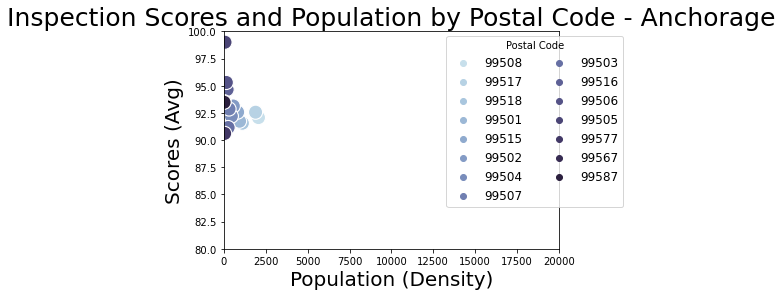

In [94]:
#Average Score for Top 5 Zips based on population density
zipPopScore = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
zipPopScore_df = zipPopScore.groupby(['postal_code', 'density'])['inspection_score'].mean().to_frame()
zipPopScore_df = zipPopScore_df.reset_index()
zipPopScore_df = zipPopScore_df.rename(columns={'inspection_score': 'average_score'})
zipPopScore_df = zipPopScore_df.sort_values(by='density', ascending=False)
zipPopScore_df = zipPopScore_df[zipPopScore_df.density > 0]
zipPopScore_df

#sns.scatterplot(data=top5zipPopScore_df, x="density", y="average_score", hue='postal_code', palette='ch:s=.25,rot=-.25');

p = sns.scatterplot(data=zipPopScore_df, x="density", y="average_score", hue='postal_code', palette='ch:s=.25,rot=-.25', s=200)
p.set_xlabel("Population (Density)", fontsize = 20)
p.set_ylabel("Scores (Avg)", fontsize = 20)
plt.legend(title="Postal Code", loc='upper right', bbox_to_anchor=(1.21, 1.008), ncol=2, fontsize = 12)
p.set_title('Inspection Scores and Population by Postal Code - Anchorage', fontsize = 25)
plt.xlim(0, 20000)
plt.ylim(80, 100);


In [95]:
oldStringCity = ['EAGLE RIVER', 'CHUGIAK', 'GIRDWOOD', 'INDIAN',
       'FT RICHARDSON', 'WASILLA', 'PORTAGE']
newStringCity = 'ANCHORAGE'
anchorageInspectsAndZips['city'].replace(oldStringCity, newStringCity, inplace=True)

In [96]:
years = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
certainZips = years[years['postal_code'].isin(['99502',
                                                                                   '99504',
                                                                                    '99507',
                                                                                    '99503',
                                                                                    '99516',
                                                                                    '99506',
                                                                                    '99505',
                                                                                    '99577',
                                                                                    '99567',
                                                                                    '99587',
                                                                                    '99518',
                                                                                    '99501',
                                                                                    '99515',
                                                                                    '99508',
                                                                                    '99517' ])]
certainZips

,business_id,business_name,city,state,postal_code,inspection_score,inspection_type,violation_description,inspection_month,inspection_day,inspection_year,postal_code_population,density
0,FA0005362,MCGINLEYS PUB,ANCHORAGE,AK,99501,94,Regular,Handwashing and Toilet Facilities,03,07,2017,15961,926
2,FA0007874,RONNIE SUSHI 2,ANCHORAGE,AK,99504,80,Regular,Temperature Control Equipment,11,22,2016,41739,437
3,FA0009047,PHO GRILL,ANCHORAGE,AK,99502,83,Regular,No Bare-hand Contact,07,13,2017,25215,554
5,FA0010756,AJ'S RIB-A-GO-GO,ANCHORAGE,AK,99507,94,Regular,Demonstration of Knowledge,06,06,2017,36403,297
10,FA0013494,JOJO'S HYPER BEAN LLC,ANCHORAGE,AK,99507,96,Regular,"Food Labeling, Food Protection",11,08,2017,36403,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Physical Facilities,07,19,2018,15961,926
16556,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Temperature Control Procedures,07,19,2018,15961,926
16557,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,"Food Labeling, Food Protection",07,19,2018,15961,926
16558,FA0000261,TWIN DRAGON,ANCHORAGE,AK,99501,90,Regular,Cleaning of Equipment and Utensils,07,19,2018,15961,926


In [97]:
avgScorePerMonthAnc = certainZips.groupby(['city','inspection_month'])['inspection_score'].mean().to_frame()
avgScorePerMonthAnc = avgScorePerMonthAnc.rename(columns={'inspection_score' : 'score'})
avgScorePerMonthAnc = avgScorePerMonthAnc.reset_index()
avgScorePerMonthAnc = avgScorePerMonthAnc.sort_values(by='inspection_month', ascending=False)
avgScorePerMonthAnc

,city,inspection_month,score
11,ANCHORAGE,12,91.732892
10,ANCHORAGE,11,92.271242
9,ANCHORAGE,10,91.782931
8,ANCHORAGE,09,92.041190
7,ANCHORAGE,08,91.817391
6,ANCHORAGE,07,92.162420
5,ANCHORAGE,06,90.871383
4,ANCHORAGE,05,92.910811
3,ANCHORAGE,04,92.606957
2,ANCHORAGE,03,92.340027


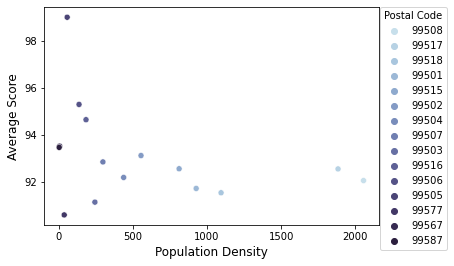

In [98]:
#Average Score for Bottom 5 Zips based on population
zipPopScore = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
zipPopScore_df = zipPopScore.groupby(['postal_code', 'density'])['inspection_score'].mean().to_frame()
zipPopScore_df = zipPopScore_df.reset_index()
zipPopScore_df = zipPopScore_df.rename(columns={'inspection_score': 'average_score'})
zipPopScore_df = zipPopScore_df.sort_values(by='density', ascending=False)
zipPopScore_df = zipPopScore_df[zipPopScore_df.density > 0]
zipPopScore_df
 

p = sns.scatterplot(data=zipPopScore_df, x="density", y="average_score", hue='postal_code', palette='ch:s=.25,rot=-.25')
p.set_xlabel("Population Density", fontsize = 12)
p.set_ylabel("Average Score", fontsize = 12)
plt.legend(title="Postal Code", loc='upper right', bbox_to_anchor=(1.22, 1.025));






In [99]:
zipPopScore2016 = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2016'])]
zipPopScore2016_df = zipPopScore2016.groupby(['postal_code', 'postal_code_population'])['inspection_score'].mean().to_frame()
zipPopScore2016_df = zipPopScore2016_df.reset_index()
zipPopScore2016_df = zipPopScore2016_df.rename(columns={'inspection_score': 'average_score'})
zipPopScore2016_df = zipPopScore2016_df.sort_values(by='postal_code_population', ascending=False)
Top10zipPopScore2016_df = zipPopScore2016_df.head(10)
Top10zipPopScore2016_df


#ax = Top10zipPopScore2016_df.plot(kind='scatter',  figsize=(7, 5), cmap='viridis', rot=0, width=.8)
#ax.legend(title='Postal Code', bbox_to_anchor=(1,1), loc='upper left')
#plt.xticks(rotation=60)
#plt.tight_layout()
#plt.savefig('')
#ax.set_title('2016', fontsize=20)
#ax.set_xlabel(xlabel='Population', fontsize=12)
#ax.set_ylabel('Average Score', fontsize=12)
#plt.show()


#sns.scatterplot(data=Top10zipPopScore2016_df, x="postal_code_population", y="average_score", hue='postal_code', style="postal_code");

,postal_code,postal_code_population,average_score
6,99504,41739,91.162234
9,99508,38042,92.027344
8,99507,36403,92.177515
20,99577,27333,88.621145
4,99502,25215,93.576923
11,99515,22226,93.781250
12,99516,20874,94.076923
3,99501,15961,92.862595
13,99517,15802,93.089552
5,99503,13017,91.910569


In [100]:
zipPopScore2016 = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2016'])]
zipPopScore2016_df = zipPopScore2016.groupby(['postal_code', 'postal_code_population'])['inspection_score'].mean().to_frame()
zipPopScore2016_df = zipPopScore2016_df.reset_index()
zipPopScore2016_df = zipPopScore2016_df.rename(columns={'inspection_score': 'average_score'})
zipPopScore2016_df = zipPopScore2016_df.sort_values(by='postal_code_population', ascending=False)
Top10zipPopScore2016_df = zipPopScore2016_df.head(10)
Top10zipPopScore2016_df

,postal_code,postal_code_population,average_score
6,99504,41739,91.162234
9,99508,38042,92.027344
8,99507,36403,92.177515
20,99577,27333,88.621145
4,99502,25215,93.576923
11,99515,22226,93.781250
12,99516,20874,94.076923
3,99501,15961,92.862595
13,99517,15802,93.089552
5,99503,13017,91.910569


In [101]:
avgInspectScorePerYear = anchorageInspectsAndZips.groupby('inspection_year')['inspection_score'].mean().to_frame()
avgInspectScorePerYear = avgInspectScorePerYear.rename(columns={'inspection_year':'year', 'inspection_score' :'score'})
avgInspectScorePerYear = avgInspectScorePerYear.reset_index()
avgInspectScorePerYear

,inspection_year,score
0,2000,91.105263
1,2001,91.888889
2,2002,90.311111
3,2003,90.732558
4,2004,91.751799
5,2005,91.429009
6,2006,90.471686
7,2007,90.791789
8,2008,90.035392
9,2009,89.927105


In [102]:
avgInspectScorePerYear = anchorageInspectsAndZips.groupby(['postal_code','inspection_year'])['inspection_score'].mean().to_frame()
avgInspectScorePerYear = avgInspectScorePerYear.rename(columns={'inspection_year':'year', 'inspection_score' :'score'})
avgInspectScorePerYear = avgInspectScorePerYear.reset_index()
avgInspectScorePerYear

,postal_code,inspection_year,score
0,95587,2016,98.000000
1,95587,2018,98.000000
2,95587,2019,96.000000
3,97205,2004,87.000000
4,97205,2005,94.500000
...,...,...,...
245,99587,2016,95.000000
246,99587,2017,92.261905
247,99587,2018,94.727273
248,99587,2019,94.000000


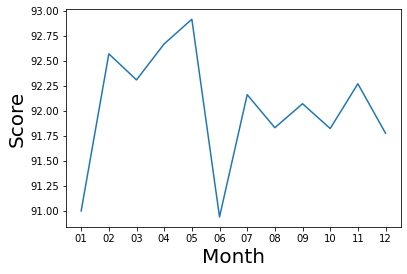

In [103]:
#Average Score: 2016-2019
years = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
avgScorePerMonth = years.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth = avgScorePerMonth.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth = avgScorePerMonth.reset_index()
avgScorePerMonth

#Line chart
plt.plot(avgScorePerMonth.inspection_month, avgScorePerMonth.score)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.show()

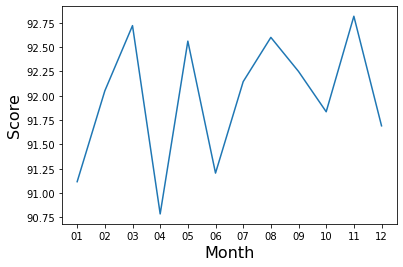

In [104]:
#2016 Only
year2016 = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2016'])]
avgScorePerMonth2016 = year2016.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth2016 = avgScorePerMonth2016.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth2016 = avgScorePerMonth2016.reset_index()

#Line chart
plt.plot(avgScorePerMonth2016.inspection_month, avgScorePerMonth2016.score)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.show()

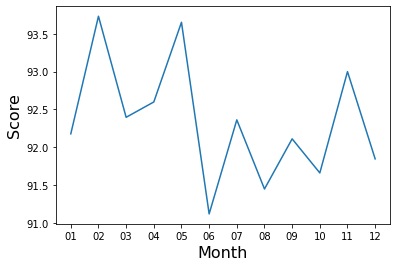

In [105]:
#2017 Only
year2017 = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2017'])]
avgScorePerMonth2017 = year2017.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth2017 = avgScorePerMonth2017.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth2017 = avgScorePerMonth2017.reset_index()
avgScorePerMonth2017 

#Line Chart
plt.plot(avgScorePerMonth2017.inspection_month, avgScorePerMonth2017.score)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.show()

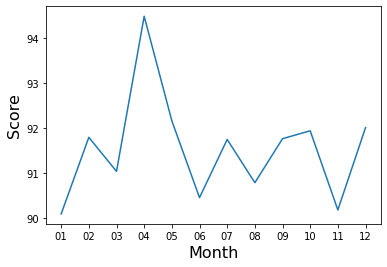

In [106]:
#2018 Only
year2018 = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2018'])]
avgScorePerMonth2018 = year2018.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth2018 = avgScorePerMonth2018.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth2018 = avgScorePerMonth2018.reset_index()
#avgScorePerMonth2018

#Line Chart
plt.plot(avgScorePerMonth2018.inspection_month, avgScorePerMonth2018.score)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.show()

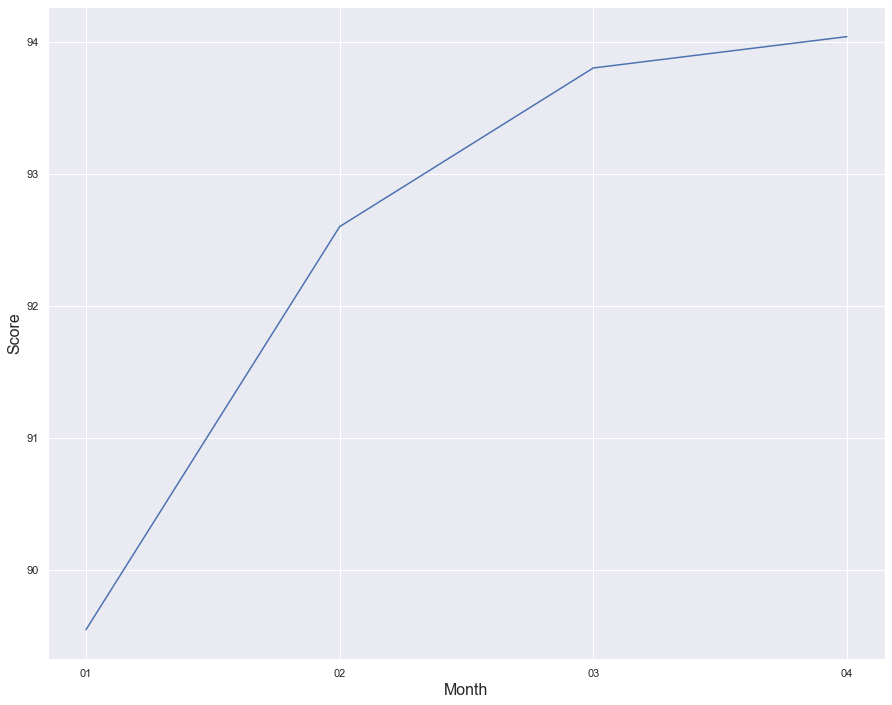

In [143]:
#2019 Only
year2019 = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2019'])]
avgScorePerMonth2019 = year2019.groupby('inspection_month')['inspection_score'].mean().to_frame()
avgScorePerMonth2019 = avgScorePerMonth2019.rename(columns={'inspection_score' : 'score'})
avgScorePerMonth2019 = avgScorePerMonth2019.reset_index()
#avgScorePerMonth2019

#Line Chart
plt.plot(avgScorePerMonth2019.inspection_month, avgScorePerMonth2019.score)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.show()

In [144]:
certainZips = years[years['postal_code'].isin(['99502',
                                                                                   '99504',
                                                                                    '99507',
                                                                                    '99503',
                                                                                    '99516',
                                                                                    '99506',
                                                                                    '99505',
                                                                                    '99577',
                                                                                    '99567',
                                                                                    '99587',
                                                                                    '99518',
                                                                                    '99501',
                                                                                    '99515',
                                                                                    '99508',
                                                                                    '99517' ])]
violDescrCount = certainZips['violation_description'].value_counts(normalize=True)
top10violDescrCount = violDescrCount.head(10)
top10violDescrCount = top10violDescrCount.reset_index()
top10violDescrCount = top10violDescrCount.rename(columns={'index' : 'violation_description', 'violation_description' : 'count'})
top10violDescrCount







,violation_description,count
0,Cleaning of Equipment and Utensils,0.204549
1,Temperature Control Procedures,0.105882
2,Physical Facilities,0.098980
3,"Food Labeling, Food Protection",0.088941
4,Demonstration of Knowledge,0.085020
5,Handwashing and Toilet Facilities,0.073569
6,Date Marking,0.061020
7,"Equipment Design, Construction",0.053961
8,"Utensils, Single-service Articles",0.050667
9,"Water, Sewage, Plumbing Systems",0.032941


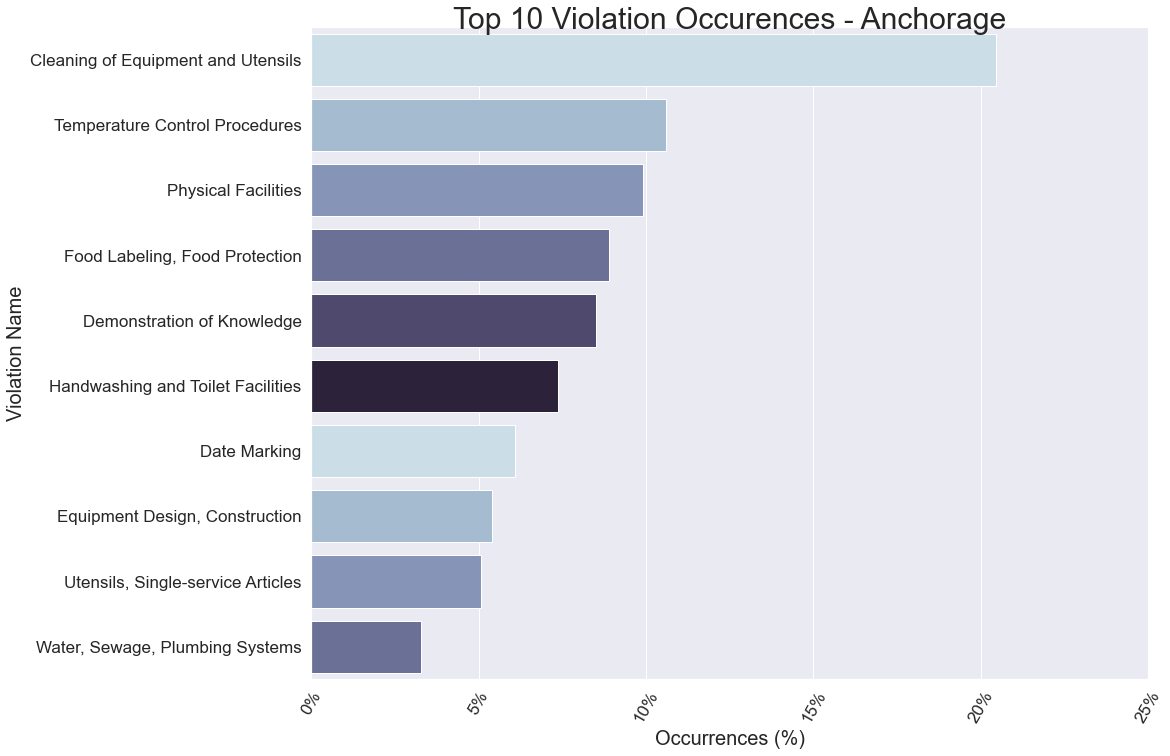

In [146]:
sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='count', y='violation_description', data=top10violDescrCount, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Occurrences (%)', fontdict= {'fontsize':20})
plt.ylabel('Violation Name', fontdict= {'fontsize':20})
plt.title("Top 10 Violation Occurences - Anchorage",fontdict= { 'fontsize': 30,'verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17)
plt.xlim(.0, .25)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0, symbol='%', is_latex=False))

In [ ]:
howManyAnchorages = certainZips[certainZips['city'].isin(['ANCHORAGE'])]
howManyAnchorages

In [ ]:
howManyAnchorages.postal_code.unique()

In [ ]:
#Violation Descriptions for 2016
violDescr2016 = year2016['violation_description'].value_counts().to_frame()
violDescr2016 = violDescr2016.reset_index()
violDescr2016 = violDescr2016.rename(columns={'index' : 'violation_description', 'violation_description' : 'occurences'})
top10violDescr2016 = violDescr2016.head(10)

sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='occurences', y='violation_description', data=top10violDescr2016, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Number of Occurrences', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Violation Name', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.title("Top 10 Violation Occurrences for 2016",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17);

In [ ]:
#Violation Descriptions for 2017
violDescr2017 = year2017['violation_description'].value_counts().to_frame()
violDescr2017 = violDescr2017.reset_index()
violDescr2017 = violDescr2017.rename(columns={'index' : 'violation_description', 'violation_description' : 'occurences'})
top10violDescr2017 = violDescr2017.head(10)


sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='occurences', y='violation_description', data=top10violDescr2017, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Number of Occurrences', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Violation Name', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.title("Top 10 Violation Occurrences for 2017",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17);

In [ ]:
violDescr2018 = year2018['violation_description'].value_counts().to_frame()
violDescr2018 = violDescr2018.reset_index()
violDescr2018 = violDescr2018.rename(columns={'index' : 'violation_description', 'violation_description' : 'occurrences'})
top10violDescr2018 = violDescr2018.head(10)


sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='occurrences', y='violation_description', data=top10violDescr2018, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Number of Occurrences', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Violation Name', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.title("Top 10 Violation Occurrences for 2018",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17);

In [ ]:
violDescr2019 = year2019['violation_description'].value_counts().to_frame()
violDescr2019 = violDescr2019.reset_index()
violDescr2019 = violDescr2019.rename(columns={'index' : 'violation_description', 'violation_description' : 'occurences'})
top10violDescr2019 = violDescr2019.head(10)


sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='occurences', y='violation_description', data=top10violDescr2019, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Number of Occurrences', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Violation Name', fontdict= {'fontsize':20, 'fontweight':'bold'})
plt.title("Top 10 Violation Occurrences for 2019",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'})
plt.xticks(fontsize=17, rotation=60)
plt.yticks(fontsize=17);

In [ ]:
Top10ZipByPop = anchorageInspectsAndZips.groupby('postal_code')['postal_code_population'].value_counts().to_frame()
Top10ZipByPop = Top10ZipByPop.rename(columns={'postal_code_population': 'count'})
Top10ZipByPop = Top10ZipByPop.reset_index() 
Top10ZipByPop.sort_values(by=['postal_code_population'], ascending=False, inplace=True)
Top10ZipByPop = Top10ZipByPop.drop(['count'], axis=1)
Top10ZipByPop = Top10ZipByPop.head(10)
Top10ZipByPop
#popPerZip = anchorageInspectsAndZips.groupby('postal_code').postal_code_population.value_counts().to_frame()
#popPerZip = popPerZip = popPerZip.rename(columns={'postal_code_population': 'count'})
#popPerZip = popPerZip.reset_index()
#popPerZip.sort_values(by=['postal_code_population'], ascending=False, inplace=True)
#popPerZip = popPerZip.drop(['count'], axis=1)
#popPerZip = popPerZip.head(17)
#popPerZip

In [ ]:
#Frequency of Inspections
anchorageInspectsAndZips.inspection_type.value_counts()

In [ ]:
#Subsetting by years
yearsForDistribution = anchorageInspectsAndZips[anchorageInspectsAndZips['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
yearsForDistribution 

In [ ]:
#Violation Counts and Distribution
zips = yearsForDistribution[yearsForDistribution['postal_code'].isin(['99502',
                                                                                    '99504',
                                                                                    '99507',
                                                                                    '99503',
                                                                                   '99516',
                                                                                    '99506',
                                                                                    '99505',
                                                                                    '99577',
                                                                                    '99567',
                                                                                    '99587',
                                                                                    '99518',
                                                                                    '99501',
                                                                                    '99515',
                                                                                    '99508',
                                                                                    '99517' ])]
violationCountsByRest = zips.groupby('business_id')['violation_description'].count().to_frame()
violationCountsByRest


In [ ]:
sns.boxplot(violationCountsByRest.violation_description)
plt.title('Violations per Restaurant - Anchorage', fontsize=20)
plt.xlabel(None)
plt.xticks(fontsize=15)
plt.xlim(0, 30);

In [ ]:
#Population Density by Zip
popDensityByZip_df = yearsForDistribution.groupby('postal_code')['density'].value_counts().to_frame()
popDensityByZip_df = popDensityByZip_df.rename(columns={'density': 'count'})
popDensityByZip_df = popDensityByZip_df.reset_index() 
popDensityByZip_df.sort_values(by=['density'], ascending=False, inplace=True)
popDensityByZip_df = popDensityByZip_df.drop(['count'], axis=1)
popDensityByZip_df  = popDensityByZip_df[popDensityByZip_df.density > 0]
popDensityByZip_df  



In [ ]:
yearsForDistribution.postal_code.unique()

In [ ]:
plt.hist(popDensityByZip_df.density, bins=3, color='lightblue', ec='darkblue', lw='2')
#sns.histplot(data=popDensityByZip_df, bins=3, palette='ch:s=.25,rot=-.25', legend=False)
plt.title('Anchorage Postal Codes and Population Densities Grouped', fontsize=20)
plt.xlabel('Population (Density)', fontsize=20)
plt.ylabel('Postal Codes (Count)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 11.5)
plt.xlim(0, 20000)
;



In [ ]:
#Median of violations per restaurant - 1 of 3
popDensity1 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['99502',
                                                                                    '99504',
                                                                                    '99507',
                                                                                    '99503',
                                                                                    '99516',
                                                                                    '99506',
                                                                                    '99505',
                                                                                    '99577',
                                                                                    '99567',
                                                                                    '99587'])]

violationCountsByRest1 = popDensity1.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian1 = violationCountsByRest1['violation_description'].median()
restViolationsMedian1

In [ ]:
#Median of violations per restaurant - 2 of 3
popDensity2 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['99518',
                                                                             '99501',
                                                                             '99515'])]

violationCountsByRest2 = popDensity2.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian2 = violationCountsByRest2['violation_description'].median()
restViolationsMedian2

In [ ]:
#Median of violations per restaurant - 3 of 3
popDensity3 = yearsForDistribution[yearsForDistribution['postal_code'].isin(['99508','99517'])]
violationCountsByRest3 = popDensity1.groupby('business_id')['violation_description'].count().to_frame()
restViolationsMedian3 = violationCountsByRest3['violation_description'].median()
restViolationsMedian3

In [ ]:
medians = {'density_zip_buckets' : ['First: 10/688', 
                       'Second: 3/1375',
                       'Third: 2/2050'],
           'medians' : [restViolationsMedian1, 
                       restViolationsMedian2,
                       restViolationsMedian3]}
medians_pd = pd.DataFrame(medians)
medians_pd

In [ ]:
sns.set(font_scale = 10)
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(15,12)})
cmap = sns.color_palette('ch:s=.25,rot=-.25')
ax = sns.barplot(x='density_zip_buckets', y='medians', data=medians_pd, palette=cmap)
cmap = sns.color_palette('viridis')
plt.xlabel('Postal Codes/Pop Density', fontdict= {'fontsize':20})
plt.ylabel(None)
plt.title("Violations per Restaurant (Median) - Anchorage",fontdict= { 'fontsize': 30,'verticalalignment': 'center'}, y=1.02)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.ylim(0, 6)
;

#bold text
#sns.set(font_scale = 10)
#sns.set_style('darkgrid')
#sns.set(rc={"figure.figsize":(15,12)})
#cmap = sns.color_palette('ch:s=.25,rot=-.25')
#ax = sns.barplot(x='density_zip_buckets', y='medians', data=medians_pd, palette=cmap)
#cmap = sns.color_palette('viridis')
#plt.xlabel('Buckets', fontdict= {'fontsize':20, 'fontweight':'bold'})
#plt.ylabel('Amount (Median)', fontdict= {'fontsize':20, 'fontweight':'bold'})
#plt.title("Violations per Restaurant - Anchorage",fontdict= { 'fontsize': 30, 'fontweight':'bold','verticalalignment': 'center'}, y=1.02)
#plt.xticks(fontsize=17, rotation=60)
#plt.yticks(fontsize=17)
#plt.ylim(0, 6)
#;

In [ ]:
#Beginning High Population Density by Zip
topPopDensityByZip_df  = popDensityByZip_df.head()
topPopDensityByZip_df

In [ ]:
#Visualization


In [ ]:
#Finding restaurants within high density zip codes
restaurantsHighDensity = anchorageInspectsAndZips[anchorageInspectsAndZips['postal_code'].isin(['99508', 
                                                                                                '99517', 
                                                                                                '99518', 
                                                                                                '99501', 
                                                                                                '99515'
                                                                                                ])]
restaurantsHighDensity


In [ ]:
#Restaurants for years 2016-2019 of top 5 high density pops
restaurantsHighDensityYears = restaurantsHighDensity[restaurantsHighDensity['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
restaurantsHighDensityYears

In [ ]:
#Count of restaurants found in high density zip codes
violationsTotalHighDen = restaurantsHighDensityYears['violation_description'].count()
violationsTotalHighDen

In [ ]:
#Count of restaurants found in high density zip codes
restaurantsTotalHighDen = restaurantsHighDensityYears['business_name'].nunique()
restaurantsTotalHighDen

In [ ]:
result = violationsTotalHighDen / restaurantsTotalHighDen
result

In [ ]:
#Beginning Low Population Density by Zip
popLowDensityByZip_df = popDensityByZip_df.tail()
popLowDensityByZipAsc_df = popLowDensityByZip_df.sort_values(by='density', ascending=True) 
popLowDensityByZipAsc_df

In [ ]:
#Finding restaurants within low density zip codes
restaurantsLowDensity = anchorageInspectsAndZips[anchorageInspectsAndZips['postal_code'].isin(['99587', 
                                                                                               '99567', 
                                                                                               '99577', 
                                                                                               '99505', 
                                                                                               '99506'])]
restaurantsLowDensity

In [ ]:
restaurantsLowDensityYears = restaurantsLowDensity[restaurantsLowDensity['inspection_year'].isin(['2016', '2017', '2018', '2019'])]
restaurantsLowDensityYears

In [ ]:
#Count of restaurants found in low density zip codes
violationsTotalLowDen = restaurantsLowDensityYears['violation_description'].count()
violationsTotalLowDen

In [ ]:
restaurantsTotalLowDen = restaurantsLowDensityYears['business_name'].nunique()
restaurantsTotalLowDen

In [ ]:
result = violationsTotalLowDen/restaurantsTotalLowDen
result

In [ ]:
zips = yearsForDistribution['postal_code'].nunique()
zips

In [ ]:
zips15Only = yearsForDistribution[yearsForDistribution['postal_code'].isin(['99502',
                                                                            '99504',
                                                                            '99507',
                                                                            '99503',
                                                                            '99516',
                                                                            '99506',
                                                                            '99505',
                                                                            '99577',
                                                                            '99567',
                                                                            '99587',
                                                                            '99518',
                                                                            '99501',
                                                                            '99515',
                                                                            '99508',
                                                                            '99517'])]
zips15Only


In [ ]:
year2019 = zips15Only[zips15Only['inspection_year'].isin(['2019'])]
year2019

In [ ]:
zip2019 = year2019['postal_code'].unique()
zip2019

In [ ]:
popByZip = year2019['postal_code_population'].unique()
popByZip.sum()

In [ ]:
year2018 = zips15Only[zips15Only['inspection_year'].isin(['2018'])]
year2018

In [ ]:
yearZip2018 = year2018[year2018['postal_code'].isin(['99505'])]
yearZip2018

In [ ]:
numOfRest = zips15Only['business_id'].nunique()
numOfRest

In [ ]:
totNumOfInsp = zips15Only['business_id'].count()
totNumOfInsp

In [ ]:
numInspectYear = totNumOfInsp / 4
numInspectYear 

In [ ]:
avgInspecPerYearAndRest = numInspectYear / numOfRest
avgInspecPerRest

In [ ]:
anchorageInspectsAndZips.to_csv(r'C:\Users\jrtho\Documents\NSS\Projects\Capstone-Restaurant_Inspections\data\Rest_Inspections_Anchorage_cleaned.csv', index=False)

In [ ]:
anchorageOnlyZips = yearsForDistribution[yearsForDistribution['postal_code'].isin(['99502',
                                                                            '99504',
                                                                            '99507',
                                                                            '99503',
                                                                            '99516',
                                                                            '99506',
                                                                            '99505',
                                                                            '99577',
                                                                            '99567',
                                                                            '99587',
                                                                            '99518',
                                                                            '99501',
                                                                            '99515',
                                                                            '99508',
                                                                            '99517'])]